# ADVANCED DATA SCIENCE - CAPSTONE PROJECT
## TITLE : TELECOM CUSTOMER CHURN

In this project, I use the [Telecom Customer Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn). The objective here is to make data visualization charts in order to understand the dataset and also perform necessary processing in order to prepare the dataset for training on ML models so that we can predict whether a certain customer will continue his/her subscription with a Telecom service provider or not based on certain related data.

### INTRODUCTION

Churn here refers to customer attrition, or the loss of clients/customers as they unsubscribe from the services of the Telecom company. Every company would like to have as many customers as possible. Analysis on churn data can help companies understand why their customers are ending their subscriptions.


### DATASET
This dataset was obtained from Kaggle. It can be found [here](https://www.kaggle.com/blastchar/telco-customer-churn).

The dataset originally consists of 7043 rows of customer data and 21 columns. The columns as described from the site are:

- **customerID**: Customer ID
- **gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

In [1]:
######### IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pylab
%matplotlib inline


### First look of the data:

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
#### BASIC INFO ON THE DATASET:
print("Columns:",len(data.columns))
print("Rows:", data.shape[0])
cols = list(data.columns)
print("List of columns: ", cols)

Columns: 21
Rows: 7043
List of columns:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### Feature Engineering
We first look if there are any columns with empty/Null data.

In [4]:
for column in data:
    print(column,":", data[column].isnull().sum())

customerID : 0
gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
MultipleLines : 0
InternetService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
PaperlessBilling : 0
PaymentMethod : 0
MonthlyCharges : 0
TotalCharges : 0
Churn : 0


But on closer inspection, you can see that there are " " values present in some cells under the `TotalCharges` column.

In [5]:
for col in data.columns:
    print(col," : ", data[data[col]==' '].shape[0])

customerID  :  0
gender  :  0
SeniorCitizen  :  0
Partner  :  0
Dependents  :  0
tenure  :  0
PhoneService  :  0
MultipleLines  :  0
InternetService  :  0
OnlineSecurity  :  0
OnlineBackup  :  0
DeviceProtection  :  0
TechSupport  :  0
StreamingTV  :  0
StreamingMovies  :  0
Contract  :  0
PaperlessBilling  :  0
PaymentMethod  :  0
MonthlyCharges  :  0
TotalCharges  :  11
Churn  :  0


/home/atulu/anaconda3/envs/my_ml/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan) ### assigning null value instead of " "
data = data.dropna() ##### deleting the rows with null values

Now taking a closer look at all the different data classes in each columns:

In [7]:
print(data.nunique())
print()
for col in data:
    if(data[col].nunique()<5):
        print(col, ": ",data[col].unique())

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes'

`No internet service` is redundant to `No` in several columns as they mean the same. We replace those values with just `No`

In [8]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    data[col] = data[col].replace({'No internet service':'No'})

We can also discretize the `tenure` column, this could help make the data more easily comprehensible to the model as compared to a continous value. As the value in that column is in months, we will make categories based on years (12 months).

In [9]:
print("Minimum value: ",min(data['tenure']))
print("Maximum value: ",max(data['tenure']))

tenure = data['tenure'] ### storing the original for later data visualization purpose

# Since maximum value is 72 months, we will have 6 categories in this column.
data['tenure'] = pd.cut(data['tenure'],6,labels=['1st year','2nd year','3rd year','4th year','5th year','6th year'])
data['tenure'].head()

Minimum value:  1
Maximum value:  72


0    1st year
1    3rd year
2    1st year
3    4th year
4    1st year
Name: tenure, dtype: category
Categories (6, object): [1st year < 2nd year < 3rd year < 4th year < 5th year < 6th year]

The `TotalCharges` column has data type set as string, we need to convert it to float.

In [10]:
print(type(data['TotalCharges'][0]))
data['TotalCharges'] = data['TotalCharges'].astype(float)
print(type(data['TotalCharges'][0]))

<class 'str'>
<class 'numpy.float64'>


### Analysing through Data Visualization

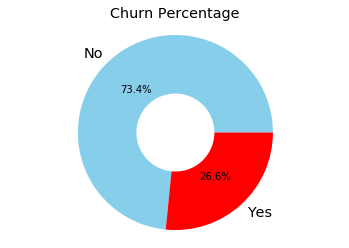

In [11]:
#### Pie chart for Churn percentage in the dataset
labels = list(data['Churn'].value_counts().keys())
vals = list(data['Churn'].value_counts())


params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.6), colors=['skyblue', 'red'])
plt.title('Churn Percentage')
plt.axis('equal')
plt.show()


This shows us that there is an imbalance in the dataset. We have a large percentage of data on customers who did not end their subscription as compared to those who did.

**Histogram:**

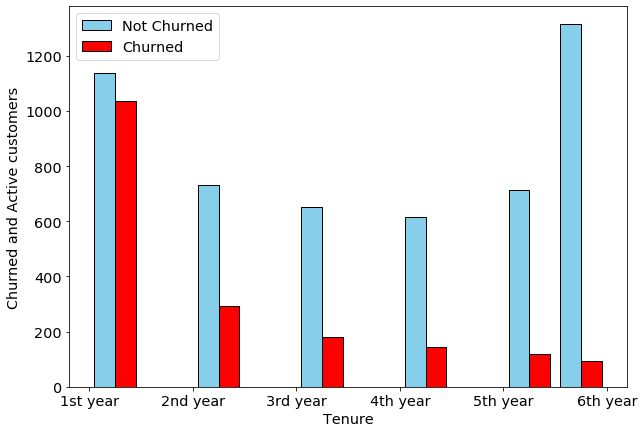

In [12]:
no_vals = data.loc[data.Churn=='No', 'tenure']
yes_vals = data.loc[data.Churn=='Yes', 'tenure']

no_vals = np.sort(no_vals)
yes_vals = np.sort(yes_vals)

plt.figure(figsize=(10,7))
plt.hist([no_vals, yes_vals], label = ['Not Churned', 'Churned'], color=['skyblue', 'red'], ec='black')
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Churned and Active customers')
plt.show()

This plot shows us that most of the customers who end their subscriptions usually do it within their first year of subscription.

**Pie Chart:**

Following are pie-charts representing the percentage of active and non-active users availing certain services.

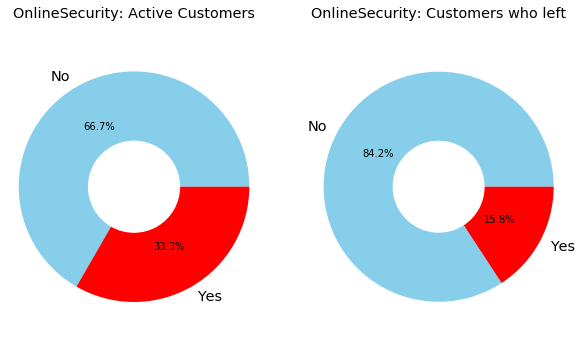

----------------------------------------------------------------------------------------------------


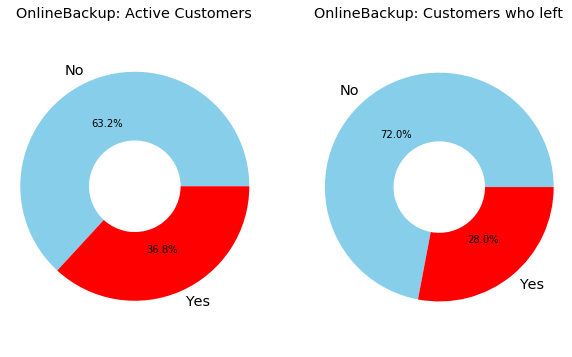

----------------------------------------------------------------------------------------------------


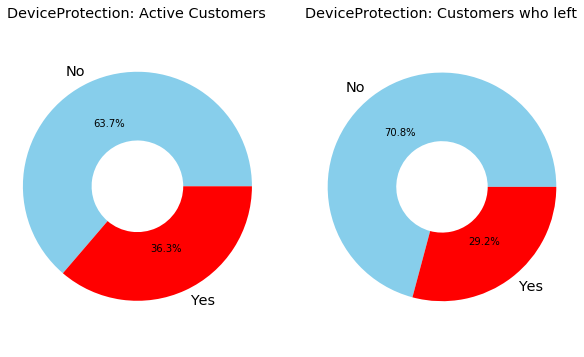

----------------------------------------------------------------------------------------------------


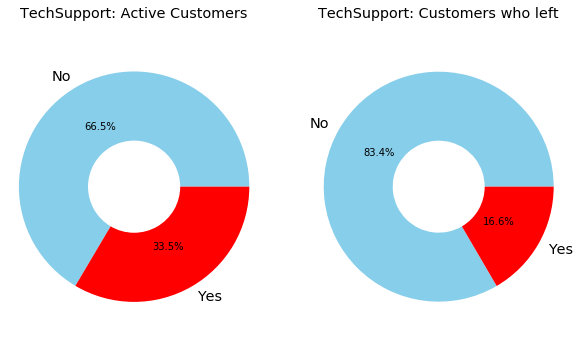

----------------------------------------------------------------------------------------------------


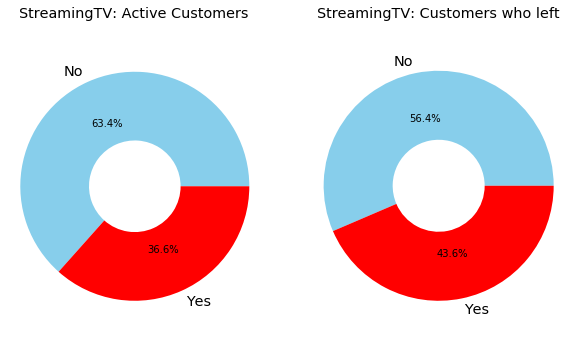

----------------------------------------------------------------------------------------------------


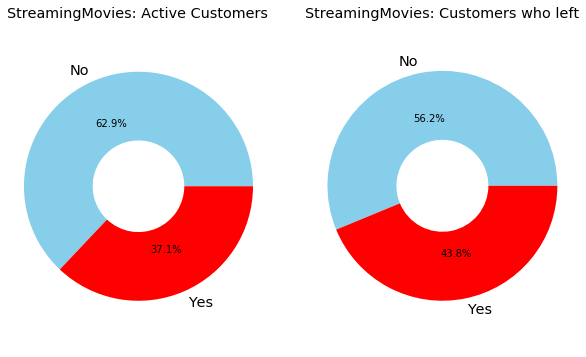

----------------------------------------------------------------------------------------------------


In [13]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

def draw_pie(col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    no_churn_label = list(data.loc[data.Churn=='No', col].value_counts().keys())
    no_churn_val = list(data.loc[data.Churn=='No', col].value_counts())
    
    churn_label = list(data.loc[data.Churn=='Yes', col].value_counts().keys())
    churn_val = list(data.loc[data.Churn=='Yes', col].value_counts())
    
    ax1.pie(no_churn_val, labels=no_churn_label, autopct='%1.1f%%', wedgeprops=dict(width=0.6), colors=['skyblue', 'red'])
    ax1.set_title(col+": Active Customers")
    ax1.axis('equal')
    
    
    ax2.pie(churn_val, labels=churn_label, autopct='%1.1f%%', wedgeprops=dict(width=0.6), colors=['skyblue', 'red'])
    ax2.set_title(col+": Customers who left")
    ax2.axis('equal')
    
    
    plt.show()
    
for i in cols:
    draw_pie(i)
    print("-"*100)
    

**Scatter plot:**

Now, a scatter plot visualization for `MonthlyCharges` and `TotalCharges`: 

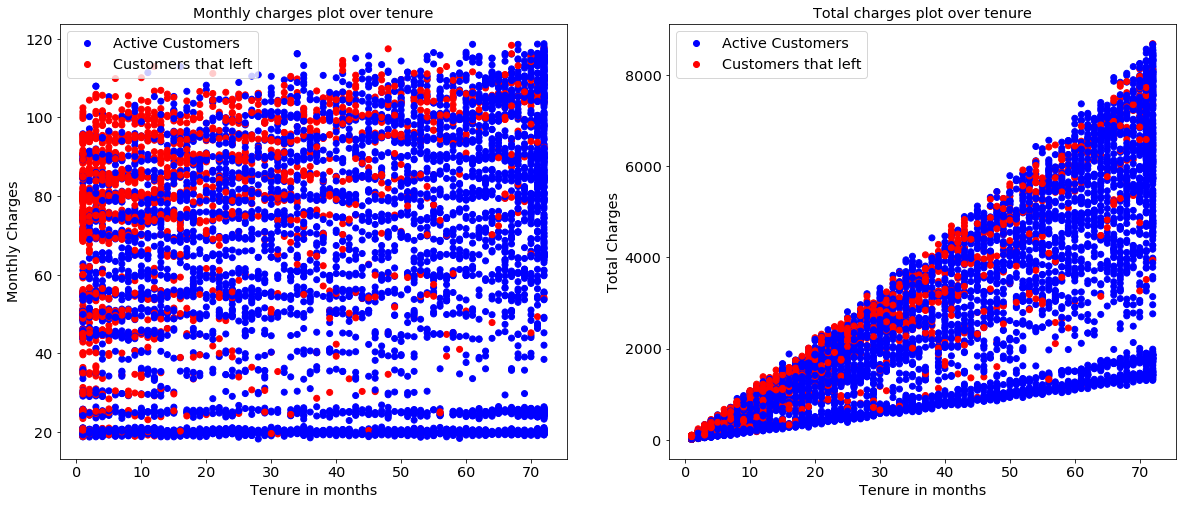

In [14]:
######## common settings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
label = data['Churn'].replace({'No':0,'Yes':1})
colors = ['blue', 'red']


######## for monthly charges
x1 = tenure
y1 = data['MonthlyCharges']

scatter=ax1.scatter(x1, y1, c=label, cmap=ListedColormap(colors))
ax1.set_xlabel("Tenure in months")
ax1.set_ylabel("Monthly Charges")
ax1.legend(handles=scatter.legend_elements()[0], labels=['Active Customers', 'Customers that left'])
ax1.set_title('Monthly charges plot over tenure')

######## for total charges
x2 = tenure
y2 = data['TotalCharges']

scatter=ax2.scatter(x2, y2, c=label, cmap=ListedColormap(colors))
ax2.set_xlabel("Tenure in months")
ax2.set_ylabel("Total Charges")
ax2.legend(handles=scatter.legend_elements()[0], labels=['Active Customers', 'Customers that left'])
ax2.set_title('Total charges plot over tenure')

plt.show()

From the above plot, one can infer that the customers who ended their subscription in the first year itself had a relatively higher monthly charge as you can see a lot of blue dots in the upper left area of the first graph. This tells us that cost could have been one reason why they decided to quit using the services.

**Correlation Matrix**:

We first make a copy of the original data, as we will have to manipulate certain data values in order to get the correlation matrix.

						Correlation matrix:


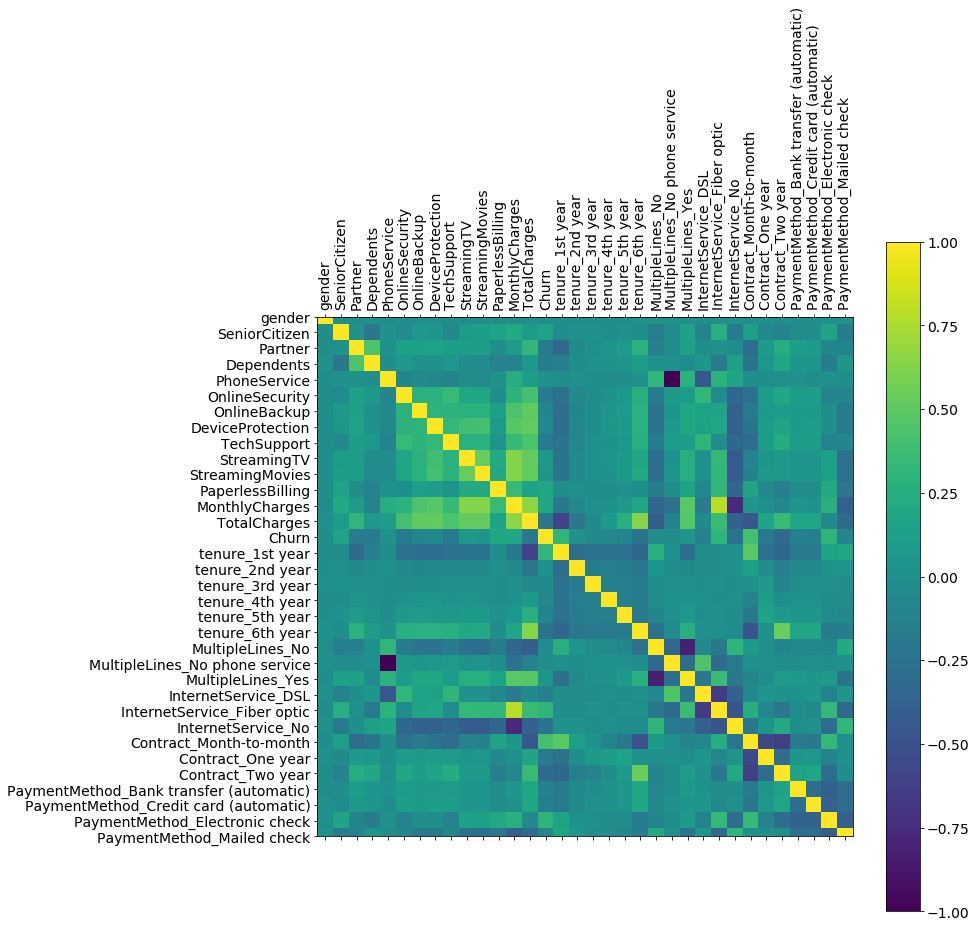

In [15]:
from sklearn.preprocessing import LabelEncoder
cor_data = data.copy()

le=LabelEncoder()
for i in list(cor_data.nunique()[cor_data.nunique() == 2].keys()):
    cor_data[i] = le.fit_transform(cor_data[i])

multi_col = ['tenure', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', ]
cor_data = pd.get_dummies(data=cor_data, columns=multi_col)

cor_data = cor_data.drop(columns = ['customerID'],axis = 1)
cor_mat = cor_data.corr()

fig = plt.figure(figsize=(12,12))
plt.matshow(cor_mat, fignum=fig.number)
plt.xticks(range(cor_data.shape[1]), cor_data.columns, fontsize=14, rotation=90)
plt.yticks(range(cor_data.shape[1]), cor_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
print("\t\t\t\t\t\tCorrelation matrix:")
plt.show()


 We can notice some obvious relations showing up here, such as all the subscription services like Streaming services, Online Protection, Tech Support, etc are directly co-related to Total and Monthly Charges. The Churn column seems to some correlation with the contract column and it makes sense that customers with monthly subscriptions are more likely to quit than yearly subscriptions.

### Final Data Preprocessing

We now proceed to the final stage of modelling our data so that it can be read by the ML and DL models that we make later.

In [16]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                 6
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

##### separating out target data from main data
y=data['Churn']
x=data.loc[:,data.columns!='Churn']

##### collecting the index number of the columns which we want to transform
cols = x.columns
binary_col_indexes=[] #list to store indexes of binary categorical features
multi_col_indexes=[] #list to store indexes of categorical features
num_col_indexes=[] #list to store numerical columns for normalizing


for i in range(len(cols)):
    if(x[cols[i]].nunique()==2):
        binary_col_indexes.append(i)
    elif(x[cols[i]].nunique()>2 and x[cols[i]].nunique()<=6):
        multi_col_indexes.append(i)
    else:
        if(i!=0):
            num_col_indexes.append(i)


x_transformer = ColumnTransformer(transformers = [('le', OrdinalEncoder(), binary_col_indexes),
                                                ('one_enc', OneHotEncoder(), multi_col_indexes),
                                                ('norm', MinMaxScaler(), num_col_indexes)])

x=x_transformer.fit_transform(x)

y_le = LabelEncoder()
y=y_le.fit_transform(y)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Creating the ML model

**Logistic Regression:**


In [18]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

log_r.fit(x_train, y_train)

score1 = log_r.score(x_test, y_test)
print("Model accuracy on the test set:",score1)

Model accuracy on the test set: 0.7974413646055437


**Xgboost Classifier:**

In [19]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train, y_train)
score2 = xg.score(x_test, y_test)
print("Model accuracy on the test set:",score2)

Model accuracy on the test set: 0.8045486851457001


**Neural Network:**

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, input_shape=(33,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
___________

In [21]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5)
score3 = model.evaluate(x_test, y_test)
print("\nModel accuracy on test set:", score3)

Train on 5625 samples, validate on 1407 samples
Epoch 1/5
5625/5625 [==============================] - 2s 345us/sample - loss: 0.4803 - acc: 0.7644 - val_loss: 0.4199 - val_acc: 0.8053
Epoch 2/5
5625/5625 [==============================] - 1s 184us/sample - loss: 0.4347 - acc: 0.7929 - val_loss: 0.4175 - val_acc: 0.8038
Epoch 3/5
5625/5625 [==============================] - 1s 173us/sample - loss: 0.4301 - acc: 0.7906 - val_loss: 0.4165 - val_acc: 0.8053
Epoch 4/5
5625/5625 [==============================] - 1s 152us/sample - loss: 0.4200 - acc: 0.7966 - val_loss: 0.4222 - val_acc: 0.7967
Epoch 5/5
1407/1407 [==============================] - 0s 147us/sample - loss: 0.4192 - acc: 0.7996

Model accuracy on test set: [0.41919838314625757, 0.79957354]


**F1 Score:**

As we have noted earlier in the data visualization section, our dataset is imbalanced as we have far more Actual Negative values (active customers - 0) than Actual Positive values (Customers who ended services - 1). For this purpose, it becomes imperative to use another model metric to understand which model actually performs better and we will use **F1 score** here as it is known to be useful in cases of imbalanced dataset.

In [22]:
from sklearn.metrics import f1_score

log_f1 = f1_score(y_test, log_r.predict(x_test))
print("The F1 score for linear regressor model is:",log_f1)
print()
xg_f1 = f1_score(y_test, xg.predict(x_test))
print("The F1 score for XGBoost model is:",xg_f1)
print()
nn_f1 = f1_score(y_test, model.predict_classes(x_test).reshape((-1,)))
print("The F1 score of the neural network is:",nn_f1)

The F1 score for linear regressor model is: 0.5525902668759811

The F1 score for XGBoost model is: 0.5801526717557252

The F1 score of the neural network is: 0.5648148148148148


The higher the F1 score, the better our model is in predicting in this case. Although all the models had pretty much similiar accuracy scores, XGBoost was better when taking F1 scores into consideration. Therefore we can conculde that the XGBoost classifier was the best among the tested models.

![](https://notdeadyetstyle.com/wp-content/uploads/2018/05/thank-you-clothesline-752x483.jpg)